# FIT5196 Task 2 in Assessment 1
#### Student Name: Neha Jain
#### Student ID: 29325013

Date: 01/09/2018

Version: 1.0

Environment: Python 3.6.4 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:
* nltk (for the lanuguage processing(otkenization, bigrams, stemming, frequency distribution, included in Anaconda Python 3.6) 
* re (for regular expression, included in Anaconda Python 3.6) 
* numpy (for numpy array, included in Anaconda Python 3.6) 
* itertools (for iterating the dictionary values, included in Anaconda Python 3.6)
* sklearn.feature_extraction.text ( for using the CountVectorizer to create the sparse representation, , included in Anaconda Python 3.6)
* matplotlib.pyplot (for creating plots, included in Anaconda Python 3.6)
* seaborn (for creating plots, included in Anaconda Python 3.6)
* pandas (for creating the frequncy dataframe, included in Anaconda Python 3.6)

# Introduction

This task touches on the next step of analyzing textual data, i.e., converting the extracted data into a proper format. This code preprocesses a set of resumes and convert them into numerical representations.

The data-set contains 250 CVs for each student. Please find the resume_dataset.txt to know the PDF files of our own data-set. 
CVs contain information about the applicants represented in the PDF format. The information includes, for example, personal information, skills, work experience, education, etc. The task is to extract and transform the information for each applicant. The aim of this task is to build sparse representations for the resumes.

Below are the tasks performed(in order) to complete this part of the assessment:
>* <b> Sentence Tokenizer</b>: Sentences are tokenized using Punkt Sentence Tokenizer.
>* <b>Normalization</b>: Then from the tokenized Sentences, if the first word starts with a capital letter, then the entire word is converted to lower case and normalised.
>* <b>Word Tokenizer</b>: The sentences are then tokenized to tokens using RegexpTokenizer.
>* <b>Bigram Generation</b>: The Bigrams are then generated using the token list and ngrams(n=2). The top 200 bigrams are picked.
>* <b>Re-Tokenization</b>: The vocab list and the token list for each Resume(stored in the Dictionary) are re-tokenized with the bigrams also using MWETokenizer.
>* <b>Stopword Removal</b>: The stopwords are removed from the re-tokenized vocab and resume token list using the given list  (_stopwords\_en.txt_).
>* <b>Context Dependent tokens</b>: The context dependent tokens with document frequency 98% or more are removed from the vocab list and the resume token list.
>* <b>Rare tokens</b>: The rare tokens with document frequency 2% or less are removed from the vocab list and the resume token list.
>* <b>Stemming</b>: The resume token list is then stemmed using the PorterStemmer. The tokens that are only in the lower case are stemmed. Other tokens are left as it as they might mean some meaning and may be useful as they are.
>* <b>Length < 3 tokens</b>: The tokens with length less than 3 are removed from the vocab list and the resume token list.
>* <b>Count Vector</b>: After all the text pre-processing, count vector representation for each resume is created using CountVectorizer.
>* <b>Storing the data to file</b>: The sparse representation is stored to '29325013_countVec.txt' file using FreqDist and the vocab is stored in '29325013_vocab.txt'.

## 1.  Import libraries 

In [1]:
import nltk 
from nltk.tokenize import RegexpTokenizer
import re
from nltk.util import ngrams
from nltk.tokenize import MWETokenizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import *
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns; sns.set()
import pandas as pd
#nltk.download()

## 2. Fetching the Resume IDs and storing them in the list

A regex is created to pull the Resume ID list from the dataset(resume_dataset.txt) for Student ID = 29325013. That data is splitted on the basis of space(" ") and stored in the form of a list to make them iterable.

Also the duplicates from the list are removed to avoid counting a Resume twice using the set() method.

In [2]:
with open('resume_dataset.txt', 'r', encoding='utf8') as resume_dataset_file:
    resume_dataset = resume_dataset_file.read()

    #searching using the regex to pull the Resume IDs for this file
dataset = re.search(r'(29325013:\[)(.*?)(?:\])', resume_dataset, re.DOTALL|re.MULTILINE)

resume = dataset.group(2).replace('\n', '')

resume_list = resume.split(" ") # IDs are split on the basis of " "
resume_list = list(set(resume_list)) # The duplicates are removed from the list by using set method and stored as a list

while '' in resume_list:
    resume_list.remove("")


In [3]:
print("The total number of unique Resumes to be processed are", len(resume_list))

The total number of unique Resumes to be processed are 224


## 3. Tokenization and Normalization

Each Resume file with ID in the Resume list is read. Then it is tokenised w.r.t. sentence using Punkt Sentence Tokenizer.
Then the first word is checked if is starts with the Upper case or not using regex ```r'^[\W]*[A-Z]'```. If matched, the word is changed to the lower case completely and updated in the sentence.

After that the sentence is tokenized to tokens using RegexpTokenizer and updated in the dictionary.
The dictionary contains the (key, value) pair as (Resume_ID, token_list)

In [4]:
resume_dict = {}

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle') # using Punkt Sentence Tokenizer
bigram = []
p = re.compile('^[\W]*([A-Z][A-Za-z]*)', re.DOTALL|re.MULTILINE) # extracting the first word of sentence to be normalised
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?") #Regex used for Tokenizing the sentences to tokens
length = 0
for each in resume_list:
    
    unigram_token = []

    filename = '.\\resumeTxt\\resume_('+ each +').txt' # each Resume filename
    tokens = []
    with open(filename, 'r', encoding = 'utf8') as file: #opening and readin the file
        line = file.read()

        sentences = sent_detector.tokenize(line.strip()) #sentence tokenising 
        for sent in sentences:
            
            
            if re.match(r'^[\W]*[A-Z]', sent): # checking if the first character is Upper case of not
                sent_list = list(sent)      #if uppercase it will be normalised
                
                x = str(p.match(sent).group(1))
               
                length = len(x)
               
                idx = sent.index(x)  
                
                sent_list[idx:length] = sent[idx:length].lower()   #updating the normalised word to the sentence
                sent = ''.join(sent_list)
                
                              
            unigram_token += tokenizer.tokenize(sent)    #tokenizing the sentence
    resume_dict[each] = unigram_token     # storing the tokens for each resume to the dictionary against the Resume ID
        
vocab = list(chain.from_iterable(resume_dict.values()))
words_start = list(chain.from_iterable(resume_dict.values()))
vocab_set_start = list(set(words_start))
lexical_diversity_start = len(words_start)/len(vocab_set_start)

<b>Below is the lexical diversity of all the Tokens derived from all the Resumes after Normalisation and Tokenization.</b>

In [5]:
words = list(chain.from_iterable(resume_dict.values()))
vocab_set = list(set(words))
lexical_diversity = len(words)/len(vocab_set)
print ("Vocabulary size: ",len(vocab_set),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  17444 
Total number of tokens:  144723 
Lexical diversity:  8.296434304058701


## 4. Extracting Bigram form the Vocab

Bigrams are sequences of two words from a given sequence of text. 
They are needed to be generated first before removing the stopwords , context dependent and rare tokens as removing them after might remove a few useful Bigrams that might have been generated using those tokens.

Example of Brgrams are: ('Hong', 'Kong'), ('Pte', 'Ltd'), ('financial', 'statements')

We are using ngrams method to generate the bigrams and filtering the Top 200 Bigrams using the FreqDist method.

In [6]:
bigrams = ngrams(vocab, n = 2)   # generating bigrams
fdbigram = FreqDist(bigrams)     # creating Frequency Distribution of bigrams
bi = fdbigram.most_common(200)   #pulling the top 200 bigrams
    
bi = [each[0] for each in bi]    # dropping the frequency of the bigrams from the list

## 5. Re-Tokenization

Tokenization task in Section 3 tokenises only unigrams present in the Resumes. 
In Task 4, we found the top 200 Bigrams that and we need to make sure that they are not split into two individual words when tokenized. For this we are using MWEtokenizer to re-tokenize the original tokens list. This replaces the tokens that created bigrams in the abstract text, with the bigrams identified.

In [7]:
mwe_tokenizer = MWETokenizer(bi)    # using MWETokenizer to re-tokenise using the bigrams

vocab = mwe_tokenizer.tokenize(vocab)    # tokenize the vocab list
resume_dict_bi = dict((key, mwe_tokenizer.tokenize(value)) for key,value in resume_dict.items())  # tokenizing the Resume 
                                                                                                # Dictionary


<b>Below is the new lexical diversity of all the Tokens derived from all the Resumes after updating the Bigrams.</b>

In [8]:
words = list(chain.from_iterable(resume_dict_bi.values()))
vocab_set = list(set(words))
lexical_diversity = len(words)/len(vocab_set)
print ("Vocabulary size: ",len(vocab_set),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  17640 
Total number of tokens:  135553 
Lexical diversity:  7.684410430839002


## 6. StopWord Removal

The stopwords are the Context Independent tokens that hold little lexical content. They are often functional words in English, for example, articles, pronouns, particles, and so on. In NLP and IR, we usually exclude stop words from the vocabulary.

The file used as a reference is 'stopwords_en.txt'. The file is read and splitted into lines.

Finally they are removed from the token list and the vocab.

In [9]:
stop = open('stopwords_en.txt', 'r')  # reading the stopword file and splitting it into the list
stopword = stop.read().splitlines()

In [10]:
resume_dict_stop = {}
for each in resume_list:
    resume_dict_stop[each] = [token for token in resume_dict_bi[each] if token.lower() not in stopword]  
    # removing the stopword form the token list in the dictionary
    

<b>Below is the new lexical diversity of all the Tokens derived from all the Resumes after updating the Bigrams.</b>

In [11]:
words = list(chain.from_iterable(resume_dict_stop.values()))
vocab_after_stop_word = list(set(words))
lexical_diversity = len(words)/len(vocab_set)
print ("Vocabulary size: ",len(vocab_after_stop_word),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  17077 
Total number of tokens:  107314 
Lexical diversity:  6.083560090702948


### Percentage of StopWords removed

In [12]:
print("Percentage of Stopword removed are:", len(vocab_after_stop_word)*100.0/len(vocab))

Percentage of Stopword removed are: 12.598024388984383


In [13]:
vocab = vocab_after_stop_word

## 7. Removing the Context Dependent and Rare Tokens

The Context Dependent Tokens are assumed to be the tokens that appear in the 98% or more of the Resumes.
The Rare Tokens are assumed to be the tokens that appear in the 2% or less of the Resumes.

Such tokens are removed form the token list and the Vocab.

Lets look at the Frequency Distribution of the Most Common and Least Common words

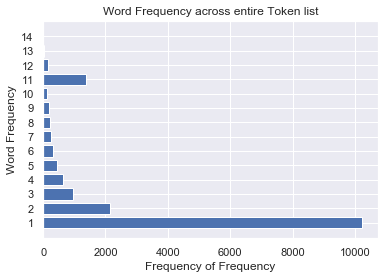

In [14]:
words_2 = list(chain.from_iterable([set(value) for value in resume_dict_stop.values()]))
fd_2 = FreqDist(words_2)  # creating the frequency distribution of the token list
ffd = FreqDist(fd_2.values())
y = [0]*14   # generating the values to be plotted
for k, v in ffd.items():
    if k <= 10:
        y[k-1] = v
    elif k >10 and k <= 50:
        y[10] =  y[10] + v
    elif k >50 and k <= 100:
        y[11] =  y[11] + v
    elif k > 100 and k <= 500:
        y[12] =  y[12] + v
    else:
        y[13] =  y[13] + v
x = range(1, 15) # generate integer from 1 to 14
ytks = map(str, range(1, 15)) # covert a integer list to a string list

plt.barh(x,y)
plt.yticks(x, ytks)
plt.xlabel('Frequency of Frequency')
plt.ylabel('Word Frequency')
plt.title("Word Frequency across entire Token list")
plt.grid(True)

The above Bar chart defines the number of times a words appears.
As visible, there are more than 10000 words that appear only once.

Below is the visual representation of the frequency of the 25 most common words across the entire token list i.e. the number of times each word appears and the top 25 from that list.

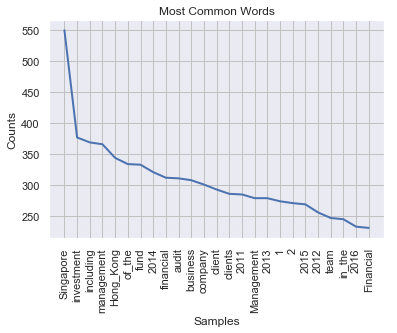

In [15]:
fd_1 = FreqDist(words)   # plotting the most frequent Words
fd_1.most_common(25)
fd_1.plot(25, title = "Most Common Words")


Finding Context Dependent and Rare Tokens:

In [16]:
frequency_dict = {}  # creating a frequency dictionary

context_dependent = []  # context dependent word list
rare = []   # rare tokens word list

for word in vocab:
    count = 0
    for each in resume_list:
        if word in resume_dict_stop[each]:
                count+=1
    frequency_dict[word] = count*100.0/len(resume_dict_stop)  
    if (count*100.0/len(resume_dict_stop))<=2:   # checking is the frequency dictionary is <=2
        rare.append(word)
        

    if count*100.0/len(resume_dict_stop)>=98:   # checking is the frequency dictionary is >=98
        context_dependent.append(word)
        
remove_list= rare+context_dependent


In [17]:
frequency_dict = sorted(frequency_dict.items(), key=lambda x:x[1], reverse = True)
    #sorting the frequency

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


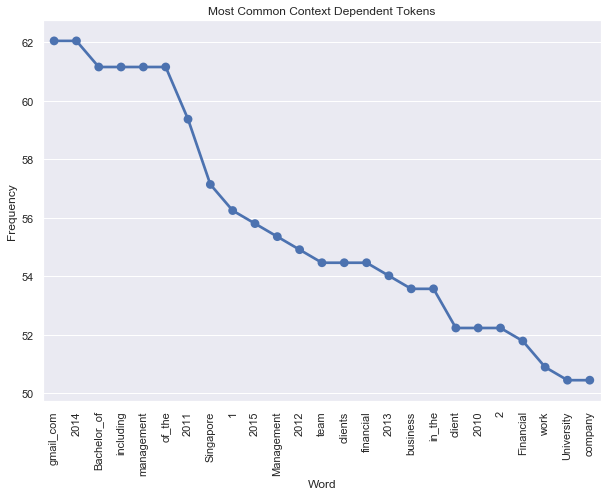

In [18]:
frequency_dict = dict(frequency_dict)  

freq = pd.DataFrame.from_dict(frequency_dict, orient='index') #converting the dictionary to dataframe
freq = freq.reset_index()
freq.columns = ['Word', 'Frequency']
freq_common = freq.head(25)  # picking the top 25 most frequent words
freq_common['order'] = [s for s in range(0,25)]
freq_common = freq_common.set_index('order')
freq_common = freq_common.sort_values('Frequency', ascending=False)
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.pointplot(x = 'Word', y = 'Frequency', data=freq_common, hue_order = 'Frequency' )
ax.set_xticklabels(freq_common.Word, rotation=90)
plt.title("Most Common Context Dependent Tokens")
plt.show()

Above graph shows the 25 Most Common Context Dependent Tokens w.r.t. Document Frequency

In [19]:
freq['Frequency'] = ((freq['Frequency']*len(resume_dict_stop))/100).astype(int)


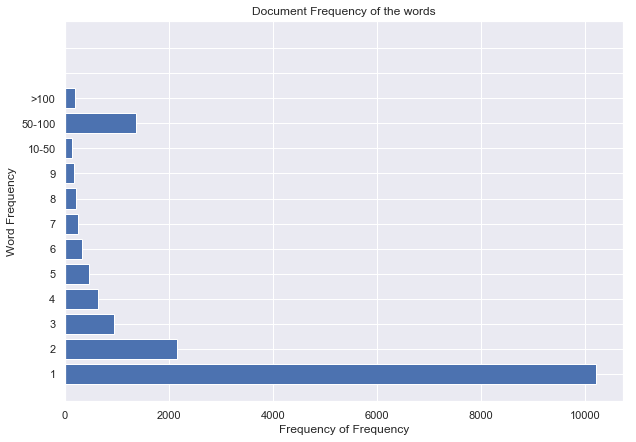

In [20]:
y = [0]*14   # creating the ferquncey graph of the tokens w.r.t. document
for k in freq['Frequency']:
    if k == 0:
        y[0]+=1
    elif k <=10:
        y[k-1]+=1
    elif 10<k<=50:
        y[10]+=1 
    else:
        y[11]+=1

x = range(1, 15) # generate integer from 1 to 14
ytks = map(str, ['1','2','3','4','5','6','7','8','9','10-50', '50-100', '>100']) # covert a integer list to a string list

plt.barh(x,y)
plt.yticks(x, ytks)
plt.xlabel('Frequency of Frequency')
plt.ylabel('Word Frequency')
plt.title("Document Frequency of the words")
plt.grid(True)

As visible from the above graph, most of the tokens are rare, i.e. they appear in 1% or less number of documents. 

Now removing the Context Dependent and Rare tokens

In [21]:
resume_dict_r = {}
for i in resume_list:  # removing the rare and context dependent tokens
        resume_dict_r[i] = [token for token in resume_dict_stop[i] if token not in remove_list]   

<b>Below is the new lexical diversity after all the Rare and Context Dependent Tokens are removed from the token list</b>.

In [22]:
words = list(chain.from_iterable(resume_dict_r.values()))
vocab_after_removing = list(set(words))
lexical_diversity = len(words)/len(vocab_after_removing)
print ("Vocabulary size: ",len(vocab_after_removing),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  3119 
Total number of tokens:  83874 
Lexical diversity:  26.891311317730043


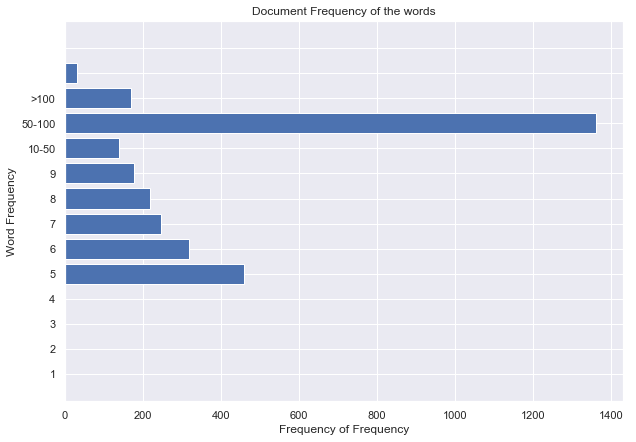

In [23]:
frequency_dict = {}
for word in vocab_after_removing:  #recheking the document frequency after removing the tokens by plotting
    count = 0
    for each in resume_list:
        if word in resume_dict_r[each]:
                count+=1
    frequency_dict[word] = count

y = [0]*14
for k in frequency_dict.values():
    if k == 0:
        y[0]+=1
    elif k <=10:
        y[k-1]+=1
    elif 10<k<=50:
        y[10]+=1
        
    elif 50<k<=100:
        y[11]+=1
    else:
        y[12]+=1
    
x = range(1, 15) # generate integer from 1 to 14
ytks = map(str, ['1','2','3','4','5','6','7','8','9','10-50', '50-100', '>100']) # covert a integer list to a string list

plt.barh(x,y)
plt.yticks(x, ytks)
plt.xlabel('Frequency of Frequency')
plt.ylabel('Word Frequency')
plt.title("Document Frequency of the words")
plt.grid(True)

As visible now, after removing the Rare tokens and Context Dependent tokens, most of the words now present in vocab are present in 50-100 number of documents.

## 8. Stemming of the tokens list

For the purposes of analysis, it is useful to stem the tokens. The task of stemming is to reduce the same word in different lexical forms to its base form in the lexicon without significantly loosing the meaning.
We have used PorterStemmer to stem the tokens.

In [24]:
stemmer = PorterStemmer()  # Stemmer used w.r.t. this task
resume_dict_stem = {}
for i in resume_list:
    list_token =  resume_dict_r[i]
    for y in range(len(list_token)):
        if list_token[y] == list_token[y].lower():  # if the token is in the lower case, only then is it stemmed
            list_token[y] = stemmer.stem(list_token[y])
    resume_dict_stem[i] = list_token

<b>Below is the new lexical diversity of all the Tokens after stemming.</b>

In [25]:
words = list(chain.from_iterable(resume_dict_stem.values()))
vocab_after_stemming = list(set(words))
lexical_diversity = len(words)/len(vocab_after_stemming)
print ("Vocabulary size: ",len(vocab_after_stemming),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  2487 
Total number of tokens:  83874 
Lexical diversity:  33.72496984318456


## 9. Removing tokens of Length less than 3

Next we remove the Tokens which are of length less than 3 from out token list

In [26]:
resume_dict_len = {}
for i in resume_list:
        resume_dict_len[i] = [token for token in resume_dict_stem[i] if len(token) >= 3]  # removing the tokens of length < 3


<b>Below is the new lexical diversity of all the Tokens after removing tokens of length less than 3.</b>

In [27]:
words = list(chain.from_iterable(resume_dict_len.values()))
vocab_after_len = list(set(words))
lexical_diversity = len(words)/len(vocab_after_len)
print ("Vocabulary size: ",len(vocab_after_len),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  2402 
Total number of tokens:  80598 
Lexical diversity:  33.554537885095755


In [28]:
words_end = list(chain.from_iterable(resume_dict_len.values()))
vocab_set_end = list(set(words_end))
lexical_diversity_end = len(words_end)/len(vocab_set_end)

## 10. Count Vector generation

CountVectorization is the conversion of a collection of text documents to a matrix of token counts.

For this purpose we are using CountVectorizer that will use the vocab i.e. the set of the token list from all the Resume.

In [29]:
vocab = set(list(chain.from_iterable(resume_dict_len.values())))
vectorizer = CountVectorizer(input='content', analyzer = "word", vocabulary=vocab) 
#Count Vectorizing the Resume dictionary after all pre-processing on the basis of the vocab created by us.

Next, each Resume's token list is passed and fitted in the CountVector and transformed to the matrix representation.

In [30]:
# fitting and transforming the tokens for each Resume. This will create a sparse matrix.
data_features = vectorizer.fit_transform([' '.join(value) for value in resume_dict_len.values()]) 
print (data_features.shape)

(224, 2402)


Below is the Count of each token in each Resume:

In [31]:
for each in data_features.toarray():
    for word, count in zip(vocab, each):
        if count > 0:
            print (word, ":", count)
         

Acted : 1
sale : 1
nativ : 1
Sourced : 1
Process : 1
to_client : 1
Championships : 1
report : 1
insight : 1
Unit : 1
plan : 2
Hall : 1
Fund_Accountant : 1
unit : 1
interfac : 2
Profit : 3
Association : 1
Words : 1
supervisor : 5
400 : 2
2001 : 1
materi : 11
ratio : 2
Test : 1
coverag : 2
Swap : 3
rank : 3
DBS : 13
consult : 1
singapor : 2
biggest : 1
obtain : 1
Festival : 1
music : 1
Proficiency : 1
inform : 3
e_g : 1
Korea : 8
Securities : 1
financ : 5
waterfal : 1
Fund_Management : 1
deposit : 1
futur : 1
Working : 1
held : 1
inquiri : 2
check : 1
ledger : 1
Head : 7
Certificate : 1
and_manag : 1
Aexeo : 1
neg : 2
vehicl : 4
KYC : 3
Monitoring : 1
Island : 3
Secretarial : 1
Telecom : 2
firm-wid : 1
Public : 4
Class_Honours : 3
Pension : 2
Operation : 2
DCF : 1
Assurance : 4
migrat : 1
campu : 4
Sun : 1
onboard : 3
dynam : 1
Preparing : 1
Review : 4
clients_in : 5
macro : 1
depth : 5
Plan : 1
Tower : 1
advis : 4
compliance_with : 4
Venture : 1
Investment : 2
Wealth : 1
reason : 1
char

in_accord : 1
Laundering : 1
College : 2
Handle : 1
2013 : 1
budget : 2
Gained : 1
Skill : 1
fair : 1
file : 1
in_Accounting : 1
Assisting : 4
compon : 1
facilit : 1
Date : 1
thesi : 1
entir : 1
References : 1
DETAILS : 1
financial_model : 1
Final : 3
Affairs : 1
Sept : 1
Ling : 1
Tax : 4
Academic : 1
Thomson : 1
3rd : 1
MANAGEMENT : 1
AVAILABILITY : 3
Physics : 1
care : 1
Taxation : 1
power : 1
Reconciliations : 1
French : 2
access : 1
semest : 1
Ambassador : 1
Society : 1
Degree : 1
brokerag : 1
Cell : 1
hoc : 1
Follow : 1
CERTIFICATION : 1
Budget : 1
area : 1
acquir : 1
ASEAN : 1
Oracle : 2
Drive : 3
chan : 4
size : 2
sale : 1
100 : 1
commentari : 1
Mutual : 3
comput : 1
employe : 3
Call : 3
Touche : 1
Manila : 1
to_client : 7
landscap : 3
cost : 1
Formulated : 1
insight : 1
plan : 3
class : 2
Canada : 1
supervisor : 1
food : 8
Page : 1
materi : 3
Race : 1
Level : 2
Position : 1
analysi : 1
Marital : 4
Festival : 1
recruit : 1
Korea : 5
payment : 1
CSA : 1
Fluent : 1
form : 1
CPF : 

Physics : 1
world : 1
exceed : 1
Coordinate : 1
quantit : 1
French : 2
drive : 1
enthusiast : 1
contact : 1
as_a : 1
Database : 1
Degree : 4
Liaised : 2
Potential : 1
manageri : 1
hoc : 1
sensit : 1
Follow : 1
Quantitative : 1
Budget : 2
creation : 1
minut : 1
Supervised : 1
Analyst : 1
Drive : 5
Information : 1
size : 1
Transaction : 1
Market : 2
extens : 1
team_to : 1
to_client : 3
portfolio : 1
Mobile : 1
for_new : 11
Lynch : 2
HTML : 1
Regulations : 1
inventori : 2
HISTORY : 2
supervisor : 1
HKD : 1
investor : 1
advisori : 1
materi : 2
ratio : 1
Maybank : 1
coverag : 2
bodi : 1
cross : 1
Level : 2
Commission : 1
Swap : 1
net : 2
DBS : 2
prompt : 1
compli : 1
200 : 1
basic : 2
Yuen : 1
futur : 5
check : 2
North : 1
ledger : 2
Head : 2
reconcili : 1
Aexeo : 4
neg : 5
practic : 1
qualit : 1
KYC : 1
Promoted : 1
Monitoring : 1
Island : 2
Secretarial : 5
Passed : 1
extern : 2
Vietnam : 1
English_Mandarin : 1
Limited : 1
Negotiable : 3
Assurance : 9
migrat : 1
product : 1
leadership : 1


relationship : 1
People : 1
advis : 1
Alternative : 1
function : 1
Performed : 1
Lotus : 2
Semester : 1
REITs : 3
verif : 1
Hotel : 1
Private : 1
visit : 2
project : 7
payabl : 1
Listed : 1
Good : 1
outlet : 1
Young : 2
BSc : 1
Global : 1
reports_and : 1
reduc : 1
closur : 1
Handle : 1
2013 : 1
qualiti : 2
Park : 1
Assisted_in : 1
abreast : 1
Date : 1
evalu : 3
prospect : 1
Software : 1
Real_Estate : 1
Thomson : 2
MANAGEMENT : 1
AVAILABILITY : 1
launch : 1
Physics : 1
New_York : 1
care : 1
Taxation : 2
and_monthli : 1
Chairperson : 1
week : 1
Employment : 2
day-to : 1
Wong : 1
linkedin : 2
as_a : 1
RSM : 1
Degree : 2
Managing : 1
brokerag : 1
EXTRA : 2
CERTIFICATION : 1
except : 3
judgment : 2
legal : 1
credit : 1
annum : 1
bill : 1
commentari : 1
employe : 3
Call : 4
Sourced : 2
Power : 1
APAC : 2
portfolio : 1
QUALIFICATION : 3
keen : 6
for_new : 2
unit : 1
Regulations : 1
supervisor : 2
Page : 3
softwar : 1
incom : 1
ACRA : 1
Swap : 2
net : 2
Advisors : 2
qualifi : 1
Korea : 1
cap :

Rate : 1
to_client : 3
Formulated : 2
disburs : 2
keen : 2
for_new : 2
Fund_Accountant : 1
interfac : 1
Estate : 1
client' : 1
sharehold : 1
Broker : 1
Canada : 1
Thailand : 3
Regulations : 10
HISTORY : 1
HKD : 5
govern : 1
materi : 2
clientel : 2
Handled : 1
Test : 3
Race : 1
ACRA : 2
Commission : 1
Swap : 2
Standard : 1
DBS : 25
singapor : 1
obtain : 1
recruit : 3
Korea : 3
Yuen : 2
futur : 1
document : 1
and_manag : 1
particip : 1
practic : 1
qualit : 1
KYC : 3
Island : 4
Singapore_Pte : 1
extern : 1
interperson : 2
leadership : 3
Particulars : 2
onboard : 1
Review : 1
workflow : 1
order : 1
Kingdom : 1
advis : 1
Alternative : 1
Delivered : 2
Venture : 1
articl : 2
charge_of : 2
Courses : 1
Financial : 4
Lotus : 1
train : 2
Semester : 1
methodolog : 1
KPMG : 2
weak : 2
verif : 1
monthli : 2
Science : 1
visit : 1
Authority : 1
Legal : 3
accounting_and : 2
Finance_and : 3
Planning : 1
cum : 1
upstream : 1
experience_in : 2
Listed : 4
Good : 1
merger : 3
profici : 1
June : 2
Updated : 

particip : 1
practic : 4
Swimming : 1
Writing : 1
Citco : 1
Promoted : 1
team_in : 1
Island : 2
Qualifications : 1
Telecom : 1
model : 1
firm-wid : 1
Vietnam : 1
Asset : 2
Public : 5
Limited : 2
Chi : 1
degre : 1
banker : 2
for_a : 7
DCF : 2
Assurance : 2
interperson : 1
Hong_Kong : 1
product : 1
wealth : 5
campu : 1
own : 1
leadership : 3
research_and : 1
Sun : 3
Mandarin : 6
score : 1
valid : 1
Modelling : 1
segment : 2
clients_in : 2
effort : 2
PRC : 1
medium : 1
entiti : 1
M_A : 1
process : 1
depth : 2
Overseas : 1
relationship : 1
People : 1
Debate : 1
Account : 2
Tower : 2
advis : 29
Shan : 1
regist : 2
Alternative : 3
compliance_with : 2
function : 1
Improvement : 2
USA : 1
Personal : 2
Investment : 1
Graduate : 1
Wealth : 2
reason : 1
joint : 1
Courses : 1
Communication : 1
Attained : 1
Junior_College : 4
Lotus : 5
Semester : 1
KPMG : 1
REITs : 4
Employee : 1
Transfer : 1
person : 1
weak : 1
SAFE : 1
set : 2
monthli : 1
Science : 1
session : 1
Yoga : 3
visit : 1
newslett : 1
as

unlist : 1
Expertise : 1
Cross : 2
GCC : 1
SMEs : 1
onshor : 1
qualiti : 1
Hotels : 3
End : 2
Familiar : 2
launch : 2
care : 3
law : 1
and_monthli : 1
manufactur : 1
access : 1
Degree : 3
SFRS : 1
Managing : 1
EXTRA : 5
Follow : 2
fast : 1
Oracle : 1
Analyst : 1
Drive : 2
sale : 1
commentari : 2
employe : 2
team_to : 1
to_client : 3
expect : 1
insight : 1
plan : 1
for_new : 1
Association : 2
Broker : 2
ad-hoc : 2
supervisor : 2
HKD : 1
food : 2
Assistant : 1
incom : 1
cross : 1
Position : 3
Development : 1
analysi : 1
Marital : 1
DBS : 3
singapor : 1
Vitae : 1
Administrative : 2
NUS : 1
Aexeo : 1
neg : 1
Passed : 1
firm-wid : 1
for_a : 1
Hong_Kong : 1
campu : 1
Particulars : 1
number : 1
PRC : 1
advis : 10
function : 1
Delivered : 1
Courses : 1
Legal : 2
accounting_and : 1
Selected : 1
Scheme : 3
cum : 1
experience_in : 1
Security : 1
profici : 1
Photoshop : 1
Microsoft_Office : 1
Institution : 2
closur : 1
Handle : 1
2013 : 1
Standards : 1
Speaker : 1
Assisting : 1
qualiti : 1
facilit

and_manag : 1
reconcili : 1
qualit : 1
Island : 2
Passed : 2
Company : 1
degre : 1
Group : 1
serv : 1
Associate : 1
leadership : 1
Particulars : 1
onboard : 1
valid : 1
clients_in : 3
mobil : 2
PRC : 3
Plan : 1
People : 1
Account : 1
advis : 8
Shan : 2
regist : 2
Malay : 1
function : 1
Relations : 2
Wealth : 1
reason : 1
reporting_and : 1
methodolog : 2
REITs : 3
Experiences : 1
session : 1
Dissertation : 4
deliver : 1
Junior : 1
excess : 2
Scheme : 1
Options : 1
AVP : 1
Listed : 5
team_of : 2
countri : 1
money : 2
coach : 1
Demonstrated : 1
College : 1
Logistics : 1
closur : 1
SKILLS : 1
card : 1
funds_and : 1
Speaker : 1
qualiti : 2
senior : 1
facilit : 1
Paribas : 1
California : 2
evalu : 1
thesi : 2
Hotels : 1
financial_model : 3
CFA : 1
Piano : 1
rate : 2
Tax : 3
Familiar : 1
financial_institut : 1
Abroad : 1
Dubai : 3
Thomson : 1
Federation : 4
AVAILABILITY : 1
launch : 1
Control : 1
power : 1
volum : 2
semest : 1
Wong : 1
Society : 1
fix : 1
Managing : 2
Ability : 1
liaison : 1


to_client : 1
Stock : 1
for_new : 1
Markets : 1
UNIVERSITY : 3
fit : 1
Regulations : 4
supervisor : 1
PwC : 1
cash_flow : 1
Captain : 1
Test : 2
PowerPoint : 2
Accounting : 2
internal_control : 1
DBS : 9
quotat : 1
singapor : 1
biggest : 1
cap : 1
payment : 1
compli : 1
Administrative : 1
External : 1
strategi : 1
futur : 3
check : 1
North : 2
Certificate : 1
Aexeo : 1
Writing : 1
vehicl : 2
Promoted : 2
team_in : 1
Island : 5
Secretarial : 1
CAREER : 1
Passed : 2
LANGUAGE : 1
Public : 1
Spanish : 1
histori : 1
Assurance : 1
Diploma_in : 1
campu : 2
leadership : 1
Particulars : 1
success : 1
PRC : 1
medium : 1
workflow : 1
Plan : 2
Leading : 1
Overseas : 1
advis : 3
Companies : 1
function : 2
Venture : 1
articl : 1
Communication : 1
Financial : 1
Lotus : 1
methodolog : 4
REITs : 8
Employee : 1
person : 1
reconcil : 1
weak : 2
Science : 2
Dissertation : 1
Selected : 1
publish : 3
Finance_and : 1
Table : 1
project : 1
Scheme : 1
2006 : 2
Listed : 3
Good : 5
monitor : 1
day : 4
debt : 1
r

materi : 1
Swap : 1
Position : 1
Development : 1
Marital : 1
Advisors : 1
parent : 1
DBS : 2
Festival : 1
Korea : 1
Fluent : 1
NUS : 2
Aexeo : 2
KYC : 1
Spanish : 1
for_a : 1
Particulars : 1
segment : 1
internet : 1
macro : 1
Plan : 1
Valuation : 2
Tower : 1
advis : 6
Companies : 4
Personal : 2
Courses : 2
Asia-Pacific : 1
Semester : 1
SAFE : 1
Hotel : 1
visit : 2
Dissertation : 2
SPVs : 1
Selected : 1
Senior_Associate : 2
Listed : 1
team_of : 1
day : 2
Young : 1
unlist : 1
profici : 1
June : 1
Photoshop : 1
coach : 1
Paper : 1
manual : 2
2013 : 1
SKILLS : 2
close : 1
Travel : 1
fair : 1
GCC : 1
Speaker : 2
in_Accounting : 1
Assisting : 1
SMEs : 1
compon : 2
onshor : 1
evalu : 1
thesi : 1
entir : 2
Treasurer : 2
rate : 2
Tax : 1
SAS : 1
March : 1
Actions : 1
Ngee : 1
MANAGEMENT : 1
launch : 2
2000 : 1
interest : 1
volum : 1
French : 2
Employment : 3
Society : 2
fix : 2
Liaised : 1
EXTRA : 2
design : 1
Southeast : 1
orient : 1
fast : 1
familiar : 1
Drive : 1
size : 2
bill : 1
sale : 1
M

Manage : 1
size : 1
SCHOOL : 1
knowledge_of : 1
author : 2
deep : 1
Elementary : 1
100 : 2
nativ : 2
Call : 1
Touche : 2
Presented : 2
Strategic : 2
Formulated : 1
Stock : 1
insight : 1
plan : 2
Hall : 1
for_new : 1
Fund_Accountant : 1
Ernst_Young : 2
Thailand : 1
inventori : 1
advisori : 1
cash_flow : 1
cross : 4
Commission : 1
Swap : 3
Position : 1
PowerPoint : 1
Marital : 1
oversight : 1
Advisors : 1
DBS : 9
singapor : 1
music : 1
qualifi : 1
request : 1
financ : 1
Administrative : 1
Fund_Management : 1
basic : 1
held : 1
Certificate : 1
NUS : 2
neg : 2
Academy : 1
Promoted : 1
LLP : 2
team_in : 3
Island : 4
invoic : 2
degre : 2
for_a : 2
Negotiable : 1
Operation : 1
Assurance : 3
Hong_Kong : 1
wealth : 4
Particulars : 1
built : 1
Assist : 1
Plan : 1
advis : 2
Alternative : 1
compliance_with : 4
function : 2
Personal : 1
Graduate : 1
reason : 4
Lotus : 1
train : 1
REITs : 2
person : 1
Science : 2
charter : 1
visit : 2
Scholarship : 1
Finance_and : 1
Scheme : 1
Listed : 7
Consumer : 

Employee : 1
weak : 5
live : 1
visit : 1
Authority : 1
Dissertation : 2
Legal : 1
SPVs : 1
Participated : 1
interim : 1
Finance_and : 1
assist : 1
clients_and : 2
British : 2
sell-sid : 4
experience_in : 4
Listed : 4
Consumer : 1
Security : 1
Culture : 5
Due : 1
IFRS : 1
Board : 1
SQL : 1
Indonesian : 1
Relationship : 1
reports_and : 1
coach : 1
Paper : 1
manual : 1
Travel : 3
fair : 2
GCC : 1
seminar : 1
Speaker : 11
Assisting : 1
compon : 2
qualiti : 1
Park : 1
Achievements : 2
abreast : 1
amount : 2
evalu : 1
DETAILS : 1
guid : 2
rate : 1
club : 1
End : 1
Actions : 3
Academic : 1
Familiar : 1
Abroad : 8
Federation : 3
AVAILABILITY : 2
world : 1
Production : 1
data : 2
Funds : 1
as_a : 2
Database : 1
Liaised : 1
sensit : 1
liaison : 1
CERTIFICATIONS : 2
except : 1
design : 1
liaise_with : 2
at_th : 1
Deal : 1
expertis : 1
Supervised : 1
depart : 1
annum : 1
Acted : 1
averag : 1
extens : 2
sale : 2
level : 1
nativ : 1
commentari : 2
comput : 3
employe : 1
Call : 1
Power : 1
APAC : 1
t

Yoga : 1
visit : 2
Dissertation : 4
Legal : 1
publish : 2
Table : 1
Planning : 1
excess : 2
Scheme : 1
upstream : 3
AVP : 1
Listed : 2
Good : 2
Young : 1
unlist : 1
Updated : 1
full : 1
College : 1
Handle : 1
Travel : 1
Speaker : 2
qualiti : 4
facilit : 1
second : 2
Upper : 1
base : 1
dealer : 1
Sept : 1
Alumni : 1
SAS : 1
Abroad : 1
Real_Estate : 1
Thomson : 1
AVAILABILITY : 1
accuraci : 1
Sector : 1
power : 1
quantit : 1
access : 1
data : 2
Employment : 1
fix : 3
Hung : 1
NTU : 2
liaison : 5
CERTIFICATIONS : 1
Southeast : 1
LLC : 1
liaise_with : 1
List : 2
minut : 1
Drive : 1
Manage : 1
size : 1
annum : 1
level : 2
commentari : 2
comput : 2
Call : 3
Sourced : 4
University : 3
based_on : 1
Presented : 5
to_client : 8
Sole : 2
portfolio : 1
Equities : 1
Championships : 2
insur : 1
insight : 1
plan : 4
Hall : 2
treasuri : 1
unit : 3
interfac : 1
Lynch : 1
Association : 1
sharehold : 2
Broker : 1
ISDA : 1
Regulations : 1
HISTORY : 1
supervisor : 4
HKD : 1
govern : 1
wallet : 2
materi : 1

HKFRS : 6
Familiar : 1
main : 1
Thomson : 1
background : 1
launch : 1
Physics : 1
2000 : 1
Control : 1
Statement : 2
law : 1
exceed : 1
Title : 1
Chairperson : 1
volum : 1
French : 1
licens : 1
Funds : 1
Employment : 1
day-to : 1
Wong : 1
contact : 1
as_a : 2
and_Mandarin : 1
Degree : 9
brokerag : 1
Liaised : 1
manageri : 2
settlement : 1
sensit : 1
Follow : 1
except : 1
Yan : 1
orient : 2
liaise_with : 1
Drive : 3
contribut : 1
deep : 5
commentari : 5
Mutual : 2
employe : 1
Sourced : 4
Pte : 6
Equities : 1
Strategic : 1
buy-sid : 1
clean : 3
QUALIFICATION : 1
expect : 2
Lynch : 1
Resident : 1
sharehold : 1
Researched : 1
fit : 2
Regulations : 1
supervisor : 1
HKD : 1
food : 1
PwC : 2
materi : 5
ACRA : 1
Swap : 3
Specialist : 4
analysi : 1
internal_control : 1
Advisors : 1
DBS : 1
inform : 1
Korea : 10
Administrative : 1
Listing : 1
Statistics : 1
NUS : 2
middl : 1
vehicl : 2
Island : 1
Passed : 1
print : 1
citi : 1
valid : 2
PRC : 2
workflow : 1
Supply : 2
macro : 5
relationship : 1
T

Familiar : 3
Abroad : 1
Risk : 1
Ngee : 1
daili : 1
compar : 1
AVAILABILITY : 1
advanc : 1
2000 : 1
care : 3
Title : 1
and_monthli : 1
volum : 1
French : 2
Employment : 1
day-to : 1
Money : 2
mandat : 1
Wong : 1
as_a : 1
EXTRA : 6
pitch : 1
hoc : 2
sensit : 1
liaison : 1
2005 : 2
GROUP : 1
Choir : 2
Analyst : 1
size : 1
nativ : 1
Mutual : 3
comput : 1
employe : 4
Call : 2
Sourced : 3
University : 1
platform : 1
seek : 1
to_client : 6
Pte : 2
Championships : 1
expect : 1
insight : 1
disburs : 1
plan : 2
Broker : 1
HKD : 3
food : 8
SFA : 2
wallet : 1
Page : 1
PwC : 2
explor : 1
incom : 1
Race : 1
Level : 1
Swap : 2
Specialist : 1
Development : 2
analysi : 1
border : 1
hous : 1
Trade : 1
approach : 1
bookkeep : 1
and_intern : 1
DBS : 2
Festival : 2
music : 1
Proficiency : 1
Permanent : 2
Korea : 2
to_work : 1
CSA : 1
financ : 2
Fluent : 2
impact : 2
CPF : 1
basic : 2
futur : 2
Head : 1
and_manag : 2
NUS : 3
Leadership : 1
default : 1
sponsorship : 1
Passed : 2
Pension : 1
DCF : 3
companie

Valuation : 3
People : 1
Account : 4
Tower : 6
Companies : 2
function : 1
Delivered : 1
Improvement : 1
Personal : 2
International : 1
Relations : 5
Graduate : 2
charge_of : 1
Courses : 1
Champion : 2
Attained : 2
1998 : 5
Lotus : 3
Audited : 1
train : 2
Semester : 1
reporting_and : 1
methodolog : 3
KPMG : 1
REITs : 13
liais : 4
Transfer : 1
reconcil : 2
Hotel : 1
ensur : 1
Engineers : 1
visit : 1
Dissertation : 1
accounting_and : 4
cope : 5
provid : 4
learn : 1
Selected : 2
soft : 2
junior : 1
publish : 2
Performance : 3
Finance_and : 2
Planning : 1
analys : 14
assist : 1
Econometrics : 1
Scheme : 15
cum : 7
ACHIEVEMENTS : 1
investig : 1
XBRL : 1
Word_Excel : 1
experience_in : 3
exist : 1
Listed : 7
Consumer : 1
Good : 1
servic : 9
merger : 4
team_of : 1
day : 3
setup : 1
Enterprise : 2
unlist : 2
profici : 10
June : 8
Expertise : 1
Photoshop : 1
LANGUAGES : 1
countri : 2
coach : 9
in_accord : 4
Paper : 17
Demonstrated : 5
Laundering : 1
Involve : 1
closur : 2
manual : 8
Handle : 2
20

reconcil : 1
gap : 1
company' : 1
provid : 1
Planning : 1
project : 1
Scheme : 2
cum : 2
experience_in : 2
Listed : 1
June : 1
Ordinance : 1
front : 1
coach : 1
Laundering : 1
reduc : 1
manual : 4
Handle : 1
Member : 1
2013 : 1
budget : 1
England : 1
fair : 1
societi : 1
seminar : 1
Assisting : 2
Brokers : 1
Park : 1
IPOs : 1
amount : 1
thesi : 1
DETAILS : 1
guid : 2
Affairs : 2
Treasurer : 1
Tax : 1
read : 1
Summer : 1
Familiar : 1
Dubai : 2
Chairman : 1
correspond : 2
Federation : 1
MANAGEMENT : 1
launch : 3
2000 : 1
care : 2
taxat : 1
Production : 2
access : 1
semest : 1
Funds : 4
Ave : 1
as_a : 2
RSM : 1
fix : 1
NTU : 1
EXTRA : 2
sensit : 1
Follow : 2
CERTIFICATIONS : 2
River : 1
Analyst : 1
worth : 1
Drive : 2
sale : 3
nativ : 1
commentari : 3
Call : 1
team_to : 1
seek : 1
to_client : 1
portfolio : 1
Championships : 1
Toronto : 1
Formulated : 1
treasuri : 1
Fund_Accountant : 2
unit : 1
client' : 1
UNIVERSITY : 1
HKD : 1
maxim : 1
Pool : 1
food : 5
SFA : 2
materi : 3
Notes : 1
Swap

visit : 1
asset : 1
Excellence : 1
Dissertation : 2
Legal : 1
cope : 1
Grade : 1
publish : 1
Participated : 1
Trustee : 2
Scheme : 2
Listed : 1
valu : 1
reduc : 1
manual : 2
FINANCE : 1
societi : 1
qualiti : 1
Park : 1
guidanc : 1
satisfact : 1
base : 1
Treasurer : 1
March : 1
Academic : 1
HKFRS : 1
launch : 1
Agent : 1
Chairperson : 1
as_a : 1
Database : 1
Degree : 1
fix : 1
Managing : 1
Leung : 1
Liaised : 2
liaison : 1
design : 1
Drive : 2
level : 2
commentari : 1
Mutual : 4
comput : 1
employe : 1
to_client : 1
Cost : 1
Strategic : 1
Formulated : 2
seri : 1
expect : 1
insight : 1
Resident : 1
supervisor : 1
food : 5
wallet : 2
materi : 1
cross : 1
Swap : 2
Position : 1
Development : 1
analysi : 3
DBS : 2
music : 1
Korea : 1
Listing : 1
Aexeo : 1
practic : 2
Swimming : 1
KYC : 1
Passed : 1
English_Mandarin : 1
Limited : 2
Preparation_of : 1
degre : 1
for_a : 1
Pension : 2
appli : 1
personnel : 1
segment : 1
effort : 3
advis : 5
Malay : 1
function : 1
Personal : 1
reason : 2
and_exter

present : 1
Familiar : 1
Thomson : 2
in_Business : 1
Control : 1
care : 3
exceed : 1
Coordinate : 1
manufactur : 1
data : 1
semest : 1
Wong : 1
fix : 1
EXTRA : 1
sensit : 1
liaison : 3
except : 1
design : 1
INFORMATION : 1
technic : 1
creation : 1
Choir : 1
Supervised : 1
Drive : 3
chan : 1
KPI : 1
commentari : 1
comput : 1
employe : 2
Call : 1
IRAS : 1
Process : 1
to_client : 2
Mobile : 2
Championships : 1
Microsoft : 1
clean : 1
Deals : 3
expect : 1
plan : 1
class : 1
Regulations : 4
qualif : 1
food : 2
Page : 1
PwC : 4
MBA : 1
materi : 4
Handled : 2
explor : 1
incom : 1
Maybank : 3
Swap : 1
Position : 1
analysi : 1
Marital : 2
prior : 1
DBS : 13
consult : 2
Festival : 1
recruit : 1
financ : 4
compli : 1
basic : 1
futur : 3
Statistics : 1
suspici : 1
North : 1
Head : 1
initi : 1
and_manag : 1
NUS : 1
Aexeo : 2
practic : 1
Writing : 5
vehicl : 3
proprietari : 1
Directors : 1
Island : 1
social : 1
extern : 1
firm-wid : 1
Asset : 2
English_Mandarin : 1
Limited : 1
Preparation_of : 1
Ope

econom : 2
Personal : 2
2007-2009 : 1
Exam : 1
consist : 1
Champion : 3
Asia-Pacific : 1
Lotus : 1
REITs : 6
motiv : 1
Science : 1
Clients : 1
confidenti : 1
Dissertation : 6
Legal : 3
provid : 1
Performance : 1
Scheme : 6
British : 1
cum : 2
sell-sid : 1
2006 : 2
experience_in : 1
Listed : 2
Good : 3
team_of : 1
Young : 3
profici : 5
phase : 1
Framework : 1
coach : 3
Paper : 2
manual : 1
Handle : 1
Skill : 1
duti : 1
Travel : 2
Maintained : 1
societi : 1
seminar : 1
Assisting : 1
Korean : 1
compon : 1
amount : 1
California : 3
evalu : 5
negoti : 4
Implementation : 2
References : 1
Individual : 1
financial_model : 1
Sept : 1
Fluent_in : 2
Alumni : 1
Tax : 3
SAS : 1
End : 1
Actions : 4
Academic : 8
financial_institut : 1
Chairman : 2
AVAILABILITY : 1
weekli : 1
world : 2
care : 1
quantit : 1
data : 3
semest : 1
Funds : 2
day-to : 4
contact : 1
Society : 1
fix : 1
EXTRA : 3
Follow : 2
INFORMATION : 1
liaise_with : 2
creation : 1
at_th : 1
Drive : 3
Manage : 1
size : 7
2016_Present : 1
Pe

Operation : 1
DCF : 1
Assurance : 4
wealth : 1
inanci : 1
Mandarin : 3
valid : 2
medium : 2
order : 2
depth : 1
Officer : 1
People : 1
advis : 24
Shan : 1
compliance_with : 2
Improvement : 6
Personal : 1
Courses : 5
Asia-Pacific : 1
Attained : 1
Performed : 1
REITs : 2
Employee : 2
SAFE : 3
Science : 4
ensur : 6
visit : 4
Dissertation : 15
Legal : 1
learn : 1
Scholarship : 1
excess : 1
Options : 1
commun : 1
2006 : 2
major : 1
experience_in : 1
AVP : 1
Listed : 12
real_est : 4
Good : 5
on_th : 1
monitor : 1
merger : 3
Updated : 2
Indonesian : 1
full : 4
phase : 1
Paper : 2
Demonstrated : 3
Laundering : 2
Institution : 1
Handle : 2
Planned : 3
2013 : 2
Services : 1
2009 : 2
Additional : 5
Current : 1
close : 2
interview : 9
funds_and : 1
Communicate : 2
societi : 2
Speaker : 1
Korean : 2
qualiti : 2
facilit : 13
amount : 8
Build : 1
thesi : 3
entir : 5
Design : 1
References : 1
base : 1
Fluent_in : 4
demonstr : 1
Alumni : 1
Actions : 2
paper : 2
Bachelor_of : 2
Software : 1
Academic : 2

Championships : 4
expect : 1
keen : 1
plan : 3
Profit : 1
class : 1
food : 2
Page : 1
materi : 2
incom : 2
ADDITIONAL : 1
cross : 3
Swap : 1
analysi : 1
Marital : 3
prior : 1
oversight : 3
Examination : 1
DBS : 2
Festival : 1
repres : 1
CSA : 1
financ : 1
Administrative : 1
assist_in : 1
200 : 1
basic : 5
futur : 2
held : 3
and_manag : 1
Australia : 1
NUS : 1
Aexeo : 1
neg : 2
practic : 1
Writing : 2
KYC : 1
Promoted : 1
LLP : 1
Monitoring : 1
Island : 2
Passed : 1
firm-wid : 2
serv : 1
wealth : 1
own : 1
clients_in : 1
effort : 2
success : 1
entiti : 1
M_A : 1
Supply : 1
Plan : 1
advis : 9
regist : 1
compliance_with : 1
function : 1
Personal : 2
Lotus : 1
Semester : 1
REITs : 1
SAFE : 1
Dissertation : 3
focus : 1
Legal : 1
SPVs : 1
accounting_and : 1
Citizen : 1
publish : 1
Trustee : 1
assist : 1
clients_and : 1
Scheme : 1
cum : 1
2006 : 1
experience_in : 1
Listed : 7
Good : 1
monitor : 2
topic : 1
team_of : 1
unlist : 2
valu : 1
Microsoft_Office : 1
phase : 1
coach : 3
College : 1
ma

e_g : 1
recruit : 1
Korea : 1
financ : 1
Fluent : 1
Administrative : 1
futur : 2
and_manag : 2
NUS : 2
practic : 2
Leadership : 1
Competition : 1
Directors : 1
Island : 1
Qualifications : 2
social : 1
Passed : 1
Public : 1
onlin : 1
Limited : 1
Preparation_of : 1
degre : 1
DCF : 1
Assurance : 1
Controller : 1
interperson : 1
wealth : 3
campu : 1
leadership : 1
Sun : 1
Mandarin : 1
clients_in : 1
Leading : 1
Account : 1
advis : 2
compliance_with : 1
function : 1
Delivered : 1
Month : 1
Attained : 1
Financial : 1
Lotus : 2
methodolog : 1
live : 1
charter : 1
Yoga : 1
Dissertation : 2
Real : 1
accounting_and : 3
Finance_and : 1
Planning : 1
clients_and : 1
Scheme : 1
cum : 1
XBRL : 2
experience_in : 1
AVP : 1
Listed : 6
Culture : 1
Good : 3
audit_of : 1
merger : 1
team_of : 1
Framework : 1
closur : 1
Handle : 2
2013 : 1
Skill : 3
chang : 1
Travel : 3
funds_and : 1
file : 1
Energy : 1
Speaker : 2
qualiti : 3
amount : 7
Aug : 1
evalu : 3
store : 1
Tax : 1
deliv : 1
read : 1
HKFRS : 2
Famili

Sheet : 1
effort : 1
Account : 2
advis : 2
Exam : 1
Asia-Pacific : 1
Dissertation : 1
cope : 1
day : 1
profici : 1
Travel : 3
fair : 1
Speaker : 1
Assisting : 1
compon : 3
guidanc : 3
evalu : 1
Tax : 1
SPSS : 1
main : 1
AVAILABILITY : 1
nativ : 1
employe : 1
team_to : 1
Championships : 1
Microsoft : 1
Strategic : 2
handl : 1
Resident : 1
ad-hoc : 1
Pool : 1
food : 6
Page : 1
PwC : 3
Specialist : 2
Trade : 1
Advisors : 1
DBS : 4
Permanent : 1
recruit : 1
Korea : 1
CSA : 1
Administrative : 1
waterfal : 1
holder : 1
Yuen : 1
futur : 1
NUS : 1
reconcili : 1
middl : 1
practic : 1
Swimming : 1
proprietari : 3
Academy : 1
Leadership : 2
team_in : 1
degre : 1
Pension : 4
DCF : 1
Controller : 1
interperson : 2
personnel : 2
wealth : 1
leadership : 1
Mandarin : 1
clients_in : 2
success : 1
PRC : 4
process : 1
relationship : 1
Debate : 1
advis : 1
function : 1
Personal : 1
International : 1
Relations : 1
charge_of : 1
Communication : 1
methodolog : 1
REITs : 2
weak : 1
set : 1
Engineers : 1
visit

softwar : 1
CURRICULAR : 1
incom : 3
Race : 2
ACRA : 1
Commission : 1
discuss : 1
net : 1
Advisors : 1
capabl : 1
spoken : 1
inform : 1
recruit : 1
Korea : 3
Securities : 1
payment : 2
Administrative : 3
Processed : 1
basic : 1
Institute : 1
futur : 3
candid : 1
document : 1
initi : 1
and_manag : 1
NUS : 1
neg : 3
particip : 1
practic : 2
Partner : 1
Island : 1
English_Mandarin : 1
Assurance : 2
Controller : 1
interperson : 1
Hong_Kong : 2
Diploma_in : 2
relat : 1
Review : 1
clients_in : 2
number : 1
Basketball : 1
M_A : 1
Supply : 1
Leading : 3
advis : 1
compliance_with : 1
function : 2
Investment : 1
Graduate : 2
past : 1
REITs : 1
weak : 7
visit : 3
Dissertation : 2
focus : 1
publish : 1
Trustee : 1
investig : 1
Senior_Associate : 2
sell-sid : 1
major : 1
Debt : 1
year-end : 1
Listed : 4
execut : 2
Good : 6
on_th : 1
Due : 5
team_of : 1
Young : 4
June : 1
Updated : 1
valu : 1
front : 1
Laundering : 1
manual : 2
Handle : 2
result : 1
adapt : 1
Travel : 1
fair : 1
Communicate : 2
semi

rate : 4
Tax : 7
SAS : 1
introduct : 1
End : 2
Familiar : 1
competit : 1
AVAILABILITY : 1
Number : 3
enthusiast : 3
Funds : 1
is_a : 3
as_a : 1
Degree : 1
fix : 2
Girls : 1
LLC : 1
Drive : 1
size : 3
author : 1
nativ : 2
comput : 4
Call : 1
Sourced : 1
Presented : 1
logist : 1
Equities : 1
Fund_Accountant : 1
Broker : 1
ad-hoc : 1
Thailand : 1
400 : 1
food : 6
incom : 1
cross : 2
Notes : 1
Swap : 1
Development : 1
PowerPoint : 1
border : 1
summari : 1
Trade : 1
Advisors : 1
DBS : 6
singapor : 1
Vitae : 1
Drama : 1
Korea : 1
cap : 1
Credit : 1
financ : 1
Administrative : 1
Listing : 1
basic : 5
reconcili : 2
neg : 2
Writing : 1
Monitoring : 1
Island : 1
franchis : 1
social : 1
Public : 1
Pension : 1
Operation : 1
Hong_Kong : 1
OTC : 1
Assist : 2
truste : 1
effort : 1
success : 1
entiti : 1
workflow : 2
M_A : 1
depth : 1
Valuation : 1
relationship : 1
advis : 3
Alternative : 1
Personal : 1
and_extern : 1
charge_of : 1
Faculty : 1
Anti-Money : 1
Financial : 1
REITs : 4
weak : 1
branch : 1

Certification : 2
PRC : 1
workflow : 1
Basketball : 1
Plan : 1
Debate : 1
function : 1
econom : 1
Attained : 1
Outlook : 1
REITs : 1
weak : 2
Dissertation : 3
cope : 1
Junior : 1
excess : 1
Scheme : 1
British : 1
XBRL : 1
Senior_Associate : 1
Perform : 1
experience_in : 4
AVP : 2
Part-time : 1
Good : 1
exposur : 1
Young : 1
Global : 1
Relationship : 2
money : 1
manual : 2
Current : 1
SKILLS : 1
Travel : 1
Speaker : 1
qualiti : 1
Achievements : 1
abreast : 1
amount : 1
evalu : 1
thesi : 2
base : 1
Governance : 1
demonstr : 1
Tax : 2
Actions : 5
Bachelor_of : 1
Real_Estate : 1
manag : 1
3rd : 1
Federation : 1
AVAILABILITY : 2
till : 1
advanc : 2
RMIT : 1
care : 1
access : 4
Society : 1
as_a : 1
fix : 1
NTU : 1
sensit : 1
CERTIFICATIONS : 4
certif : 1
LLC : 1
divers : 1
liaise_with : 2
credit : 1
INTERNATIONAL : 1
size : 1
nativ : 1
commentari : 1
Mutual : 2
comput : 5
employe : 2
Process : 1
Mobile : 1
Championships : 1
insight : 1
for_new : 1
Resident : 1
Broker : 1
food : 2
Page : 4
in

except : 1
design : 1
Budget : 2
legal : 2
orient : 1
fast : 1
2005 : 1
latest : 1
Analyst : 1
Drive : 2
Rate : 1
to_client : 9
Cost : 2
Formulated : 1
Built : 1
Deals : 1
Chief : 1
Lynch : 1
Resident : 1
sharehold : 1
Broker : 1
Monitor : 1
UNIVERSITY : 2
supervisor : 3
commerci : 1
HKD : 2
qualif : 1
investor : 1
food : 6
SFA : 1
wallet : 2
Page : 1
PwC : 1
MBA : 1
materi : 3
softwar : 1
Test : 1
Level : 1
Swap : 1
Marital : 2
rank : 1
internal_control : 1
of_Business : 1
Examination : 1
DBS : 1
Proficiency : 2
cap : 2
CSA : 2
financ : 1
Fluent : 1
CPF : 10
200 : 2
futur : 1
candid : 1
reconcili : 1
neg : 1
Swimming : 1
proprietari : 2
syndic : 1
Special : 1
Secretarial : 1
social : 1
cultur : 1
Passed : 1
firm-wid : 3
print : 1
Asset : 2
onlin : 2
degre : 1
for_a : 1
Pension : 1
DCF : 2
serv : 2
Assurance : 1
interperson : 1
Hong_Kong : 1
respect : 1
Diploma_in : 1
apprais : 1
Mandarin : 1
score : 1
Sheet : 1
segment : 3
clients_in : 4
mobil : 1
effort : 3
success : 1
Plan : 1
Kingd

Korean : 3
onshor : 1
qualiti : 2
Goldman : 1
Park : 1
Assisted_in : 1
guidanc : 1
abreast : 1
growth : 1
amount : 2
evalu : 1
Implementation : 1
thesi : 1
guid : 1
owner : 1
Affairs : 1
prospect : 1
Ling : 1
Tax : 3
End : 1
Actions : 3
Analysed : 1
Dubai : 1
Federation : 1
MANAGEMENT : 1
AVAILABILITY : 2
background : 1
launch : 1
accuraci : 1
New_York : 1
CHINESE : 1
care : 2
law : 3
volum : 1
2010 : 1
mandat : 1
Wong : 1
Society : 1
as_a : 2
RSM : 1
Database : 6
fix : 3
hoc : 5
CERTIFICATIONS : 2
INFORMATION : 1
legal : 2
board : 1
fast : 1
area : 1
Analyst : 1
Drive : 2
chan : 1
KPI : 1
Manage : 1
100 : 1
comput : 2
employe : 1
Call : 2
Sourced : 2
University : 2
Presented : 1
to_client : 2
Pte : 1
Strategic : 1
Broker : 1
ad-hoc : 1
Words : 1
fit : 1
HKD : 1
govern : 1
Race : 1
Swap : 2
Marital : 2
bookkeep : 1
DBS : 1
music : 1
Drama : 1
cap : 1
Analytics : 1
futur : 1
and_manag : 1
practic : 1
proprietari : 1
Citco : 1
Secretarial : 1
firm-wid : 1
Vietnam : 1
English_Mandarin : 1

publish : 2
Junior : 1
Performance : 1
Planning : 1
project : 1
Senior_Associate : 1
2006 : 1
experience_in : 2
Listed : 5
Consumer : 1
Good : 2
on_th : 1
monitor : 1
servic : 1
unlist : 1
full : 1
valu : 2
Microsoft_Office : 2
phase : 1
coach : 2
Paper : 2
manual : 1
Handle : 2
Program : 1
2013 : 1
account : 1
budget : 1
car : 1
Energy : 1
seminar : 2
Assisting : 1
Korean : 4
qualiti : 1
Assisted_in : 1
amount : 1
California : 1
Date : 1
Study : 1
evalu : 1
entir : 1
financial_model : 1
Sept : 2
CFA : 8
rate : 3
Alumni : 2
Tax : 4
Actions : 3
present : 2
background : 1
care : 3
import : 1
exceed : 1
Title : 1
and_monthli : 1
Chairperson : 1
highlight : 1
access : 2
Employment : 1
mandat : 1
linkedin : 1
Degree : 1
fix : 1
Cell : 2
hoc : 1
Follow : 1
fast : 2
EDUCATION : 2
Oracle : 1
Drive : 1
size : 1
annum : 1
nativ : 1
commentari : 1
Mutual : 3
comput : 3
employe : 6
Call : 3
Sourced : 1
University : 2
Rate : 1
Manila : 1
to_client : 3
Sole : 1
Equities : 2
Strategic : 1
seri : 1
De

Planning : 1
project : 2
excess : 1
investig : 1
payabl : 1
complet : 1
Payment : 1
Perform : 4
experience_in : 1
AVP : 1
end-to : 1
Listed : 3
on_th : 1
monitor : 1
audit_of : 1
team_of : 3
IFRS : 2
market : 1
month : 1
profici : 1
enter : 1
Hons : 1
coach : 4
Paper : 1
College : 1
Handle : 2
Additional : 1
budget : 2
chang : 2
Travel : 1
Communicate : 1
societi : 1
in_Accounting : 1
Assisting : 1
Korean : 2
qualiti : 3
Paribas : 1
abreast : 2
amount : 2
2007 : 1
Date : 1
evalu : 3
Implementation : 2
thesi : 1
References : 1
Individual : 3
SME : 1
financial_model : 1
Upper : 1
base : 2
CFA : 1
Piano : 2
demonstr : 1
March : 1
End : 1
Summer : 4
Bachelor_of : 1
competit : 1
Abroad : 1
main : 4
AVAILABILITY : 2
restructur : 1
launch : 3
global : 1
Physics : 2
care : 3
import : 1
manufactur : 1
enthusiast : 1
Employment : 1
day-to : 1
linkedin : 1
the_financi : 2
fix : 7
Managing : 1
CCA : 3
EXTRA : 3
statist : 1
Toa : 1
Follow : 4
hold : 1
Southeast : 1
Budget : 1
FATCA : 1
board : 1
or

profici : 2
Ordinance : 1
Microsoft_Office : 1
Hons : 1
Paper : 1
Demonstrated : 1
Additional : 1
Asia_Pacific : 1
funds_and : 1
fair : 1
FINANCE : 1
seminar : 1
in_Accounting : 1
Assisting : 1
Korean : 1
compon : 1
abreast : 1
amount : 1
California : 1
Final : 1
Governance : 2
Ling : 1
Piano : 1
divest : 1
End : 1
Actions : 1
Analysed : 2
Candidate : 3
Familiar : 1
Ngee : 1
compar : 2
AVAILABILITY : 1
Institute_of : 2
Control : 1
quantit : 1
enthusiast : 2
Ambassador : 1
Ave : 2
Society : 1
Set : 1
EDUCATION : 1
Drive : 1
Manage : 1
size : 1
SCHOOL : 1
Games : 1
sale : 1
level : 1
nativ : 4
commentari : 2
Mutual : 2
comput : 4
employe : 2
Call : 1
Sourced : 4
University : 1
seek : 2
Manila : 1
to_client : 2
portfolio : 1
Pte : 1
Championships : 1
Microsoft : 2
Strategic : 2
Formulated : 2
buy-sid : 1
Profit : 1
HTML : 1
Resident : 2
Broker : 3
Words : 1
UNIVERSITY : 1
Regulations : 1
HKD : 4
investor : 1
PwC : 1
materi : 1
Test : 2
Race : 2
Swap : 2
Development : 1
United : 1
Accounti

newslett : 1
Legal : 1
accounting_and : 2
cope : 1
Grade : 1
Selected : 1
publish : 1
Participated : 1
Table : 4
Planning : 1
Scheme : 2
British : 1
ACHIEVEMENTS : 1
Written : 1
Senior_Associate : 1
experience_in : 1
Listed : 3
point : 1
on_th : 1
merger : 1
unlist : 2
June : 1
full : 1
Law : 1
money : 1
coach : 4
College : 1
Handle : 1
Planned : 1
2013 : 1
Sports : 1
2009 : 1
SKILLS : 1
adapt : 2
Skill : 1
Certified_Public : 3
Travel : 3
Effectively : 1
societi : 1
resourc : 1
Speaker : 3
compon : 4
onshor : 2
Goldman : 1
abreast : 1
evalu : 1
guid : 2
Treasurer : 2
rate : 1
demonstr : 2
Tax : 3
SAS : 3
club : 2
March : 1
End : 1
present : 1
Summer : 1
Bachelor_of : 4
Familiar : 3
competit : 1
Abroad : 1
Real_Estate : 1
Thomson : 2
Hedge : 1
AVAILABILITY : 1
care : 5
law : 1
Chairperson : 1
Production : 1
Clerk : 1
French : 2
access : 1
mandat : 1
Wong : 2
Nationality : 2
Society : 2
Database : 1
Degree : 1
fix : 5
EXTRA : 3
hoc : 2
sensit : 1
Follow : 1
liaison : 1
except : 1
design 

GROUP : 1
ASEAN : 1
History : 1
transact : 1
Analyst : 2
Drive : 2
contribut : 1
Manage : 1
size : 1
extens : 2
sale : 4
100 : 4
level : 7
nativ : 2
commentari : 2
Mutual : 3
comput : 3
employe : 5
team_to : 1
Vice_President : 1
Sole : 1
portfolio : 3
Formulated : 1
plan : 1
Ernst_Young : 1
Broker : 3
ad-hoc : 2
Background : 1
food : 4
Performing : 1
PwC : 5
softwar : 1
Handled : 1
PowerPoint : 1
Marital : 2
internal_control : 2
Lead : 1
Advisors : 4
DBS : 1
biggest : 1
Proficiency : 1
capabl : 1
Drama : 1
recruit : 2
Korea : 2
CSA : 1
Fluent : 1
Listing : 1
holder : 1
Yuen : 1
Student : 1
document : 1
and_manag : 1
neg : 1
Swimming : 1
Island : 2
Secretarial : 1
Preparation_of : 1
degre : 1
Pension : 2
interperson : 3
Hong_Kong : 1
Diploma_in : 1
wealth : 1
leadership : 1
Mandarin : 2
clients_in : 2
Plan : 1
advis : 4
regist : 1
Personal : 1
2007-2009 : 1
charge_of : 3
Exam : 1
Asia-Pacific : 1
Semester : 1
methodolog : 1
REITs : 1
weak : 1
visit : 3
Real : 1
Table : 2
Planning : 1
ex

Real : 1
cope : 5
Participated : 1
Scholarship : 1
project : 2
Pricing : 5
Perform : 1
Good : 1
profici : 1
LANGUAGES : 1
2013 : 1
adapt : 1
Wall : 1
duti : 1
FINANCE : 6
societi : 3
Energy : 1
onshor : 3
abreast : 1
guid : 4
Governance : 5
dealer : 1
Ling : 3
Actions : 1
Analysed : 6
Bachelor_of : 3
Thomson : 1
access : 1
semest : 1
mandat : 1
Society : 1
as_a : 2
RSM : 1
Database : 1
Degree : 2
fix : 1
Toa : 3
Southeast : 1
fast : 4
Drive : 6
size : 1
Masters : 1
level : 1
Mutual : 1
to_client : 2
Sole : 1
Formulated : 1
seri : 1
expect : 1
Fund_Accountant : 1
Estate : 1
Resident : 1
Broker : 1
ad-hoc : 1
supervisor : 3
wallet : 2
materi : 1
incom : 1
cross : 1
Position : 4
DBS : 2
Vitae : 1
recruit : 1
Listing : 1
200 : 1
Head : 1
Aexeo : 4
practic : 3
proprietari : 2
Honor : 1
degre : 1
DCF : 1
serv : 1
appli : 1
Hong_Kong : 1
interact : 1
Sheet : 1
Modelling : 5
clients_in : 1
effort : 1
macro : 1
advis : 6
Shan : 1
Malay : 1
function : 1
Relations : 1
reason : 2
2007-2009 : 1
199

Administrative : 1
Listing : 1
Yuen : 1
subscript : 1
and_manag : 1
Aexeo : 1
neg : 3
particip : 1
Writing : 1
KYC : 1
firm-wid : 2
payrol : 1
own : 1
segment : 1
Valuation : 2
function : 1
Personal : 1
SAFE : 1
Hotel : 2
Participated : 1
assist : 1
clients_and : 2
Scheme : 2
Word_Excel : 2
experience_in : 1
Listed : 1
Due : 1
outlet : 1
Young : 1
unlist : 1
profici : 2
Updated : 1
Expertise : 1
countri : 1
coach : 2
closur : 2
manual : 1
2009 : 1
budget : 2
SKILLS : 3
card : 1
compon : 3
margin : 1
Aug : 1
2011 : 1
evalu : 1
respond : 1
entir : 1
Individual : 1
Tax : 1
introduct : 2
compar : 1
short : 1
care : 1
law : 1
Society : 2
Photography : 1
Liaised : 1
EXTRA : 3
Toa : 1
CERTIFICATIONS : 1
Southeast : 1
2014 : 1
EDUCATION : 2
Drive : 1
2016_Present : 2
Tan : 2
Elementary : 2
sale : 4
level : 2
nativ : 4
commentari : 4
Mutual : 2
comput : 2
employe : 4
Sourced : 4
portfolio : 2
plan : 2
for_new : 2
unit : 2
Broker : 1
fit : 2
ratio : 1
incom : 1
Level : 1
Commission : 3
Swap : 3


Listing : 1
basic : 9
futur : 1
Head : 2
Certificate : 1
proprietari : 6
Academy : 1
cultur : 1
Limited : 2
degre : 1
MS_Office : 3
migrat : 1
interperson : 2
Hong_Kong : 1
Diploma_in : 1
campu : 1
inanci : 1
with_extern : 1
score : 1
Sheet : 1
clients_in : 4
effort : 2
PRC : 1
Leading : 2
relationship : 1
advis : 1
compliance_with : 1
function : 1
econom : 1
Personal : 3
Graduate : 1
Reports : 2
Lotus : 1
train : 2
Semester : 2
reporting_and : 1
methodolog : 2
REITs : 4
SAFE : 1
verif : 1
Yoga : 1
visit : 3
asset : 1
SPVs : 1
accounting_and : 1
cope : 1
publish : 2
Participated : 1
deliver : 2
interim : 1
project : 1
excess : 1
British : 1
AVP : 2
Listed : 2
point : 1
on_th : 1
monitor : 1
unlist : 1
support : 1
proper : 1
reports_and : 1
Hons : 1
phase : 1
coach : 3
manual : 1
Handle : 2
2013 : 3
adapt : 1
highli : 2
Travel : 2
funds_and : 1
Maintained : 1
societi : 2
GCC : 2
Speaker : 1
compon : 1
qualiti : 3
facilit : 1
IPOs : 1
guidanc : 1
abreast : 4
California : 1
2011 : 2
evalu

Current : 1
close : 1
Travel : 2
Fund : 1
societi : 1
GCC : 1
compon : 3
onshor : 1
Park : 4
Paribas : 2
guidanc : 1
abreast : 3
amount : 4
Aug : 1
Study : 2
evalu : 1
negoti : 1
thesi : 1
References : 1
Education : 1
Hotels : 5
Final : 5
Governance : 1
Sept : 1
Tax : 7
present : 1
GST : 1
HKFRS : 2
Familiar : 8
Risk : 1
EXPERIENCES : 1
AVAILABILITY : 2
accuraci : 1
Control : 1
care : 1
taxat : 1
Reconciliations : 1
volum : 1
enthusiast : 2
Funds : 1
Society : 2
and_Mandarin : 1
Degree : 4
fix : 2
locat : 1
Hung : 1
SFRS : 1
effici : 2
Cell : 2
statist : 1
pitch : 2
sensit : 4
Follow : 3
proactiv : 1
design : 1
Advised : 2
revenu : 1
legal : 1
orient : 1
liaise_with : 4
Oracle : 1
address : 1
Drive : 1
chan : 1
financial_analysi : 2
incorpor : 1
Market : 2
averag : 2
author : 2
extens : 3
deep : 1
sale : 2
commentari : 2
employe : 2
Sourced : 1
University : 1
Power : 1
APAC : 1
team_to : 1
Manila : 1
to_client : 1
Cost : 1
Pte : 1
Championships : 2
Strategic : 2
Formulated : 6
clean : 

Modelling : 1
mobil : 1
Plan : 2
Kingdom : 1
Valuation : 1
advis : 1
Malay : 1
Asia-Pacific : 1
Outlook : 1
methodolog : 1
REITs : 2
Employee : 1
motiv : 1
reconcil : 1
SAFE : 2
ensur : 2
Engineers : 1
visit : 2
newslett : 1
focus : 1
Grade : 1
publish : 1
deliver : 2
Scheme : 3
cum : 1
Senior_Associate : 1
complet : 2
AVP : 2
merger : 2
IFRS : 1
unlist : 1
profici : 1
June : 2
Photoshop : 1
money : 1
Laundering : 1
Institution : 1
closur : 1
Handle : 1
SKILLS : 1
close : 1
Certified_Public : 1
Travel : 3
funds_and : 1
Maintained : 1
seminar : 1
Speaker : 1
compon : 2
qualiti : 1
Goldman : 1
abreast : 1
California : 2
Date : 1
respond : 1
thesi : 1
aim : 1
Treasurer : 1
Governance : 1
End : 1
read : 1
main : 1
launch : 1
Physics : 1
care : 1
Number : 1
quantit : 1
Manager : 1
French : 2
Employment : 1
mandat : 2
Wong : 3
Nationality : 2
fix : 1
EXTRA : 1
sensit : 1
Quantitative : 2
Oracle : 1
Drive : 2
Manage : 1
size : 2


## 11. Saving the Count Vector to the output file

### 11.1 Now after generating the sparse matrix, we now store this data to a file that can be further used.

In [32]:
vocab = list(vocab)
vocab.sort()

out_file = open("./29325013_countVec.txt", 'w')  # file to store the spare matrix


vocab_dict = {}
i = 0

for w in vocab:
    vocab_dict[w] = i  # assigning key to each token
    i = i + 1

for x in resume_list:
    out_file.write("Resume_(" + x + "): ")
    d = resume_dict_len[x]
    d_idx = [vocab_dict[w] for w in d]   #storing the key value of each token along with its frequency to file
    for k, v in FreqDist(d_idx).items():
        out_file.write("{}: {} ".format(k,v))
    out_file.write('\n')
out_file.close()

### 11.2 We also store the Vocab list to a file for reference to the Sparse Matrix.

In [33]:
# storing the vocab to a file for reference to sparse matrix

out_file = open("29325013_vocab.txt", 'w', encoding='utf8')
for key, value in vocab_dict.items():
    d = str(key) + ": " + str(value)
    out_file.write(d + '\n')
out_file.close()

## 12. Summary

### 12.1 Length of the Vocab

In [34]:
print("Length of the Vocab after all Pre-processing is:", len(vocab))

Length of the Vocab after all Pre-processing is: 2402


### 12.2 Length of Token list

In [35]:
print("Length of the Token List after all Pre-processing is:", len(list(chain.from_iterable(resume_dict.values()))))

Length of the Token List after all Pre-processing is: 144723


### 12.3 Lexical Diversity before Wrangling

In [36]:
print ("Vocabulary size: ",len(vocab_set_start),"\nTotal number of tokens: ", len(words_start), \
"\nLexical diversity: ", lexical_diversity_start)

Vocabulary size:  17444 
Total number of tokens:  144723 
Lexical diversity:  8.296434304058701


### 12.4 Lexical Diversity after Wrangling

In [37]:
print ("Vocabulary size: ",len(vocab_set_end),"\nTotal number of tokens: ", len(words_end), \
"\nLexical diversity: ", lexical_diversity_end)

Vocabulary size:  2402 
Total number of tokens:  80598 
Lexical diversity:  33.554537885095755


### 12.5 Sample data after each Step of Pre-processing

In [38]:
id = resume_list[0]
sparse = []
d = resume_dict_len[id]
d_idx = [vocab_dict[w] for w in d]
for k, v in FreqDist(d_idx).items():
    sparse.append("{}: {} ".format(k,v))
print("Below are the sample values after each step of the preprocessing for the first Resume ID", id, ": \n")
print("Original Token list for the ID ", id, ":\n")
print(resume_dict[id])
print("\nToken list for the ID ", id, " after updating Bigrams:\n")
print(resume_dict_bi[id])
print("Token list for the ID ", id, " after removing Stopwords:\n")
print(resume_dict_stop[id])
print("\nToken list for the ID ", id, " after removing Rare and Context Dependent tokens:\n")
print(resume_dict_r[id])
print("\nToken list for the ID ", id, " after Stemming:\n")
print(resume_dict_stem[id])
print("\nToken list for the ID ", id, " after removing tokens of length less than three:\n")
print(resume_dict_len[id])
print("\n Sparse Representation of ID", id, ":\n")
print(sparse)

Below are the sample values after each step of the preprocessing for the first Resume ID 504 : 

Original Token list for the ID  504 :

['timothy', 'WILLIAM', 'LINDELL', 'KNIGHT', 'Residing', 'in', 'Singapore', 'DP', 'Visa', '65', '9192', '6775', 'timknight', 'minumbra', 'com', 'au', 'QUAL', 'ITIES', '15', 'years', 'working', 'with', 'Goldman', 'Sachs', 'Standard', 'Chartered', 'Commonwealth', 'Bank', 'of', 'Australia', 'and', 'currently', 'with', 'a', 'middle', 'market', 'private', 'equity', 'company', 'Excellent', 'knowledge', 'of', 'asset', 'management', 'infrastructure', 'structured', 'finance', 'and', 'debt', 'origination', 'Extensive', 'understanding', 'of', 'the', 'Australian', 'mining', 'energy', 'and', 'infrastructure', 'sector', 'Highly', 'analytical', 'with', 'strong', 'attention', 'to', 'detail', 'Ability', 'to', 'easily', 'engage', 'manage', 'and', 'influence', 'stakeholders', 'Chartered', 'Practicing', 'Accountant', 'Australia', 'University', 'of', 'Sydney', 'Advanced', '

<b> This task shows us how to pre-process the data using wrangling techniques like Tokenization, Normalisation, Stemming, Frquency Distribution. Further it used the Vectorization technique to create sparse representation of data in a Numerical format for input to Information Retrieval Systems

## 13. References

1) Tutorial 4 and 5 from URL: https://moodle.vle.monash.edu/course/view.php?id=45757&section=9#9<br>
2) Exploring Pre-Processed text and Generating Features from URL: https://moodle.vle.monash.edu/course/view.php?id=45757&section=10<br>
3) Sample Report provided as a part of this assignment from URL: https://moodle.vle.monash.edu/mod/assign/view.php?id=5177464<br>
4) Usage of Seaborn Pointplot from URL: https://seaborn.pydata.org/generated/seaborn.pointplot.html